In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [6]:
datadir = '/nobackup/jakravit/data/HE60/output/EcoLight/excel/'
files = os.listdir(datadir)
print(files)
batch_name = 'case1V3'

['MI_case1V3_w5fr7678d9.txt', 'MI_case1V3_77e9rhaw7n.txt', 'MI_case1V3_sm9igrlo3v.txt']


In [7]:
# file = 'MI_case1V1_0e6u36s5v0.txt'
rrsheader = ['in air', 'Rrs']
rrs_list = []

for file in files:
    
    line_num = 0
    with open(datadir+file, 'r') as f:
        lines = f.readlines()

    for line in lines:
        line_num += 1
        if all(x in line.strip().replace('"', '').replace("'", "") for x in rrsheader):
            header = line_num
            l = line
            # print (line_num, line)
        else:
            pass
        
    lines = np.arange(header,header+200,1)
    end = header+200
    rrs = []
    wl = []

    i = 0
    with open(datadir+file, "r+") as fp:
        # access each line
        while True:
            line = fp.readline()
            # check line number
            if i in lines:
                wl.append(line.strip().split('   ')[0] )
                rrs.append(line.strip().split('   ')[1] )
            # line number greater than needed exit the loop
            # lines[-1] give last item from list
            if i > end:
                break;
            i = i + 1
    rrs_list.append(rrs)
    

<AxesSubplot:>

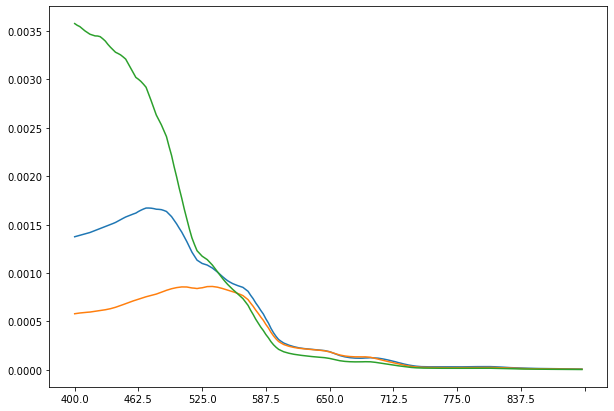

In [8]:
rrsdf = pd.DataFrame(rrs_list,columns=wl).astype(float)
rrsdf.head()

fig, ax = plt.subplots(figsize=(10,7))
rrsdf.T.plot(legend=False, ax=ax)

In [9]:
wl

['400.0',
 '402.5',
 '405.0',
 '407.5',
 '410.0',
 '412.5',
 '415.0',
 '417.5',
 '420.0',
 '422.5',
 '425.0',
 '427.5',
 '430.0',
 '432.5',
 '435.0',
 '437.5',
 '440.0',
 '442.5',
 '445.0',
 '447.5',
 '450.0',
 '452.5',
 '455.0',
 '457.5',
 '460.0',
 '462.5',
 '465.0',
 '467.5',
 '470.0',
 '472.5',
 '475.0',
 '477.5',
 '480.0',
 '482.5',
 '485.0',
 '487.5',
 '490.0',
 '492.5',
 '495.0',
 '497.5',
 '500.0',
 '502.5',
 '505.0',
 '507.5',
 '510.0',
 '512.5',
 '515.0',
 '517.5',
 '520.0',
 '522.5',
 '525.0',
 '527.5',
 '530.0',
 '532.5',
 '535.0',
 '537.5',
 '540.0',
 '542.5',
 '545.0',
 '547.5',
 '550.0',
 '552.5',
 '555.0',
 '557.5',
 '560.0',
 '562.5',
 '565.0',
 '567.5',
 '570.0',
 '572.5',
 '575.0',
 '577.5',
 '580.0',
 '582.5',
 '585.0',
 '587.5',
 '590.0',
 '592.5',
 '595.0',
 '597.5',
 '600.0',
 '602.5',
 '605.0',
 '607.5',
 '610.0',
 '612.5',
 '615.0',
 '617.5',
 '620.0',
 '622.5',
 '625.0',
 '627.5',
 '630.0',
 '632.5',
 '635.0',
 '637.5',
 '640.0',
 '642.5',
 '645.0',
 '647.5',


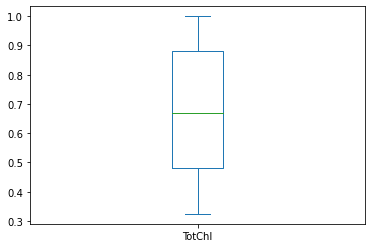

In [9]:
table = pd.read_csv('/nobackup/jakravit/data/HE60/batch_data/{}_table.csv'.format(batch_name))
list(table.columns)

table.TotChl.plot.box()
# table.min_Tot_conc.plot.box()

classes = ['Diatoms', 'Cryptophytes', 'Heterokonts', 'Dinoflagellates',
           'Green_algae', 'Haptophytes', 'Cyano_blue', 'Cyano_red', 'Rhodophytes',
           'Eustigmatophyte', 'Raphidophyte']

fractions = pd.DataFrame()
for c in classes:
    name = c + '_class_frxn'
    try:
        col = table[name]
    except:
        continue
    fractions[c] = col


<AxesSubplot:>

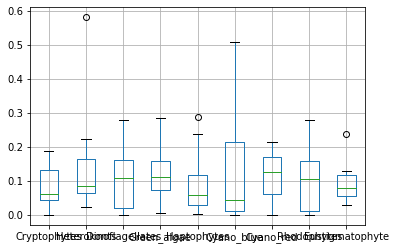

In [10]:
fractions.boxplot()

In [1]:
print(files)

NameError: name 'files' is not defined

888 " " "in air" "Rrs" "Ed" "Lw" "Lu"

chl: 0.971
min: 0.0004248997364380524
det: 0.0027656952513181207
ag: 0.0001
depth: 28
SZA: 55
SAA: 30
wind: 11.0


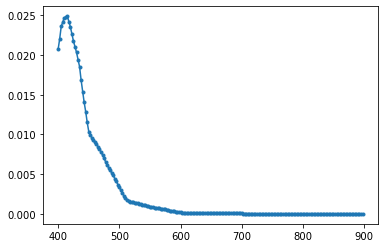

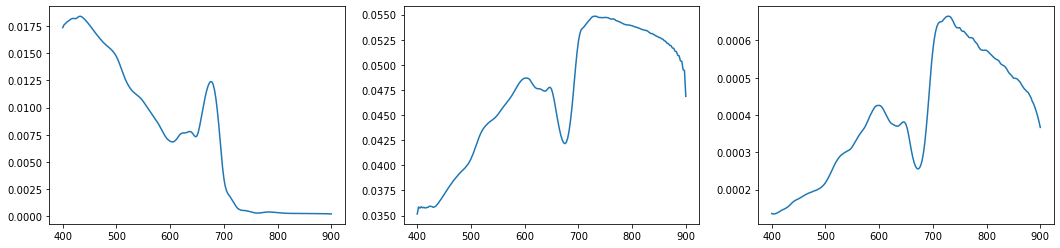

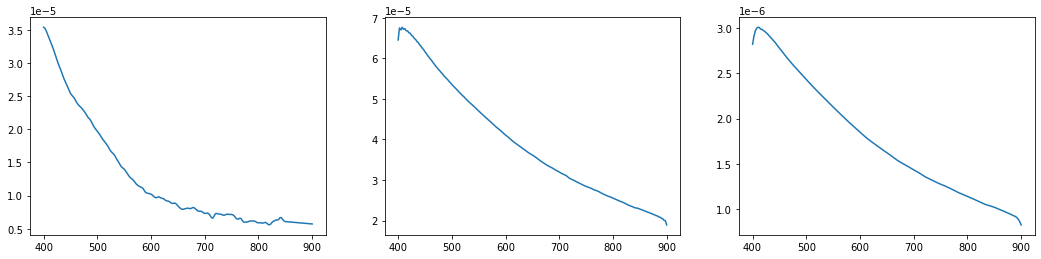

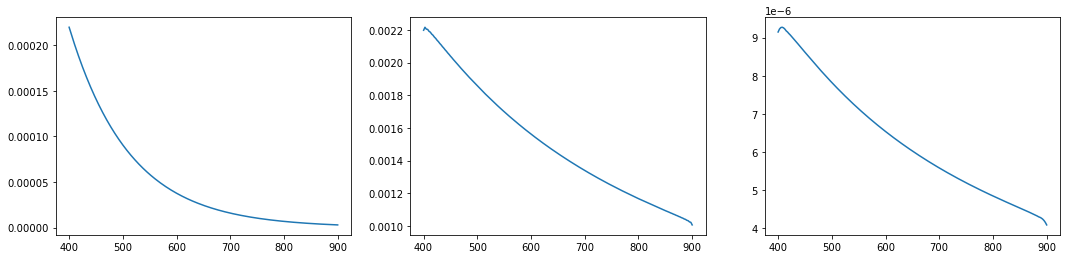

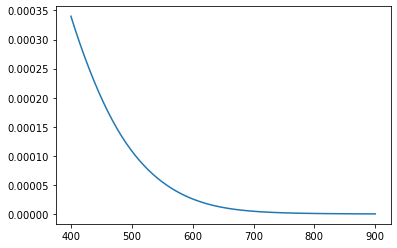

In [82]:
# file = 'MI_case1V2_h7zdsu6omm.txt'
file = files[1]
rrsheader = ['in air', 'Rrs']
line_num = 0
rrs_list = []

with open(datadir+file, 'r') as f:
    lines = f.readlines()

for line in lines:
    line_num += 1
    if all(x in line.strip().replace('"', '').replace("'", "") for x in rrsheader):
        header = line_num
        l = line
        print (line_num, line)
    else:
        pass

lines = np.arange(header,header+200,1)
end = header+200
rrs = []
wl = []

i = 0
with open(datadir+file, "r+") as fp:
    # access each line
    while True:
        line = fp.readline()
        # check line number
        if i in lines:
            wl.append(line.strip().split('   ')[0] )
            rrs.append(line.strip().split('   ')[1] )
        # line number greater than needed exit the loop
        # lines[-1] give last item from list
        if i > end:
            break;
        i = i + 1

rrs2 = pd.Series(np.array(rrs).astype(float), index=np.array(wl).astype(float))
rrs2.plot(marker='.')

import pickle
uid = file.split('_')[2].split('.')[0]
path = '/nobackup/jakravit/data/HE60/pickles/{}.p'.format(uid)
with open(path, 'rb') as fp:
    data = pickle.load(fp)
    
print ('chl: {}'.format(data['Phyto']['TotChl']))
print ('min: {}'.format(data['Min']['Tot_conc']))
print ('det: {}'.format(data['Det']['Tot_conc']))
print ('ag: {}'.format(data['CDOM']['ag440']))
print ('depth: {}'.format(data['Depth']['Dmax']))
print ('SZA: {}'.format(data['Atm']['SZA']))
print ('SAA: {}'.format(data['Atm']['SAA']))
print ('wind: {}'.format(data['Atm']['wind']))

# plot nap
wv = np.arange(400,902.5,2.5)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,4))
ax1.plot(wv,data['Phyto']['a_tot'])
ax2.plot(wv,data['Phyto']['b_tot'])
ax3.plot(wv,data['Phyto']['bb_tot'])

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,4))
ax1.plot(wv,data['Min']['a_tot'])
ax2.plot(wv,data['Min']['b_tot'])
ax3.plot(wv,data['Min']['bb_tot'])

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,4))
ax1.plot(wv,data['Det']['a_tot'])
ax2.plot(wv,data['Det']['b_tot'])
ax3.plot(wv,data['Det']['bb_tot'])

fig, ax = plt.subplots()
ax.plot(wv,data['CDOM']['a_tot'][63:])


In [16]:
data['Atm'].keys()

dict_keys(['aero', 'atm_prof', 'aero_prof', 'OZA', 'OAA', 'SZA', 'SAA', 'wind'])